In [1]:
import json
import matplotlib
from matplotlib import pyplot as plt
import pickle
import sklearn
%matplotlib inline


In [2]:
oresults_path = '../predicted-Sresults/original'
mresults_path = '../predicted-Sresults/mixed5050'
eresults_path = '../predicted-Sresults/everything'

omodels_path = '../specialModels/original'
mmodels_path = '../specialModels/mixed5050'
emodels_path = '../specialModels/everything'

test_sets = ['5050', '2575', 'everything']

mfractions = [0.05, 0.1, 0.2,
              0.3, 0.5, 0.7, 1]
efractions = [0.01, 0.02, 0.03,
             0.05, 0.1, 0.2, 0.3,
             0.5, 0.7, 1]

In [3]:
results = {'5050': {'COF': dict(),
                    'intercept': dict()},
           '2575': {'COF': dict(),
                    'intercept': dict()},
           'everything': {'COF': dict(),
                          'intercept': dict()}}
# First deal with the original models 
for tset in results:
    for target in ['COF', 'intercept']:
        with open('{}/{}.pickle'.format(omodels_path, target), 'rb') as f:
            model = pickle.load(f)
        with open('{}/{}.ptxt'.format(omodels_path, target), 'rb') as f:
            features = pickle.load(f)
        with open('{}/{}_on_{}.json'.format(oresults_path, target, tset), 'r') as f:
            data = json.load(f)
        results[tset][target]['original'] = {
#             'model': model,
#             'features': features,
#             'data': data,
              'n_train': len(model.oob_prediction_),
              'r_square': data[target]['r_square']
        }

# Then deal with the 5050 mixed models 
for tset in results:
    for fraction in mfractions:
        for target in ['COF', 'intercept']:
            with open('{}/{}_{}.pickle'.format(mmodels_path, target, fraction), 'rb') as f:
                model = pickle.load(f)
            with open('{}/{}_{}.ptxt'.format(mmodels_path, target, fraction), 'rb') as f:
                features = pickle.load(f)
            with open('{}/{}_{}_on_{}.json'.format(mresults_path, target, fraction, tset), 'r') as f :
                data = json.load(f)
            results[tset][target]['5050_{}'.format(fraction)] = {
#                 'model': model,
#                 'features': features,
#                 'data': data,
                  'n_train': len(model.oob_prediction_),
                  'r_square': data[target]['r_square']
            }
# Lastly deal with the everything models
for tset in results:
    for fraction in efractions:
        for target in ['COF', 'intercept']:
            with open('{}/{}_{}.pickle'.format(emodels_path, target, fraction), 'rb') as f:
                model = pickle.load(f)
            with open('{}/{}_{}.ptxt'.format(emodels_path, target, fraction), 'rb') as f:
                features = pickle.load(f)
            with open('{}/{}_{}_on_{}.json'.format(eresults_path, target, fraction, tset), 'r') as f :
                data = json.load(f)
            results[tset][target]['everything_{}'.format(fraction)] = {
#                 'model': model,
#                 'features': features,
#                 'data': data,
                  'n_train': len(model.oob_prediction_),
                  'r_square': data[target]['r_square']
            }


In [4]:
from pprint import pprint

pprint(results)

{'2575': {'COF': {'5050_0.05': {'n_train': 144, 'r_square': 0.3102580518604061},
                  '5050_0.1': {'n_train': 288, 'r_square': 0.2786276945985515},
                  '5050_0.2': {'n_train': 576, 'r_square': 0.32891371604385433},
                  '5050_0.3': {'n_train': 858, 'r_square': 0.32982536056743583},
                  '5050_0.5': {'n_train': 1434, 'r_square': 0.3379717420629571},
                  '5050_0.7': {'n_train': 2010, 'r_square': 0.352580418788052},
                  '5050_1': {'n_train': 2868, 'r_square': 0.3567391685871839},
                  'everything_0.01': {'n_train': 84,
                                      'r_square': 0.3291877125735849},
                  'everything_0.02': {'n_train': 162,
                                      'r_square': 0.34479067938637264},
                  'everything_0.03': {'n_train': 246,
                                      'r_square': 0.296877584467388},
                  'everything_0.05': {'n_train': 408,
         

## Combination R<sup>2</sup> Plots
Special models (top 3 features)

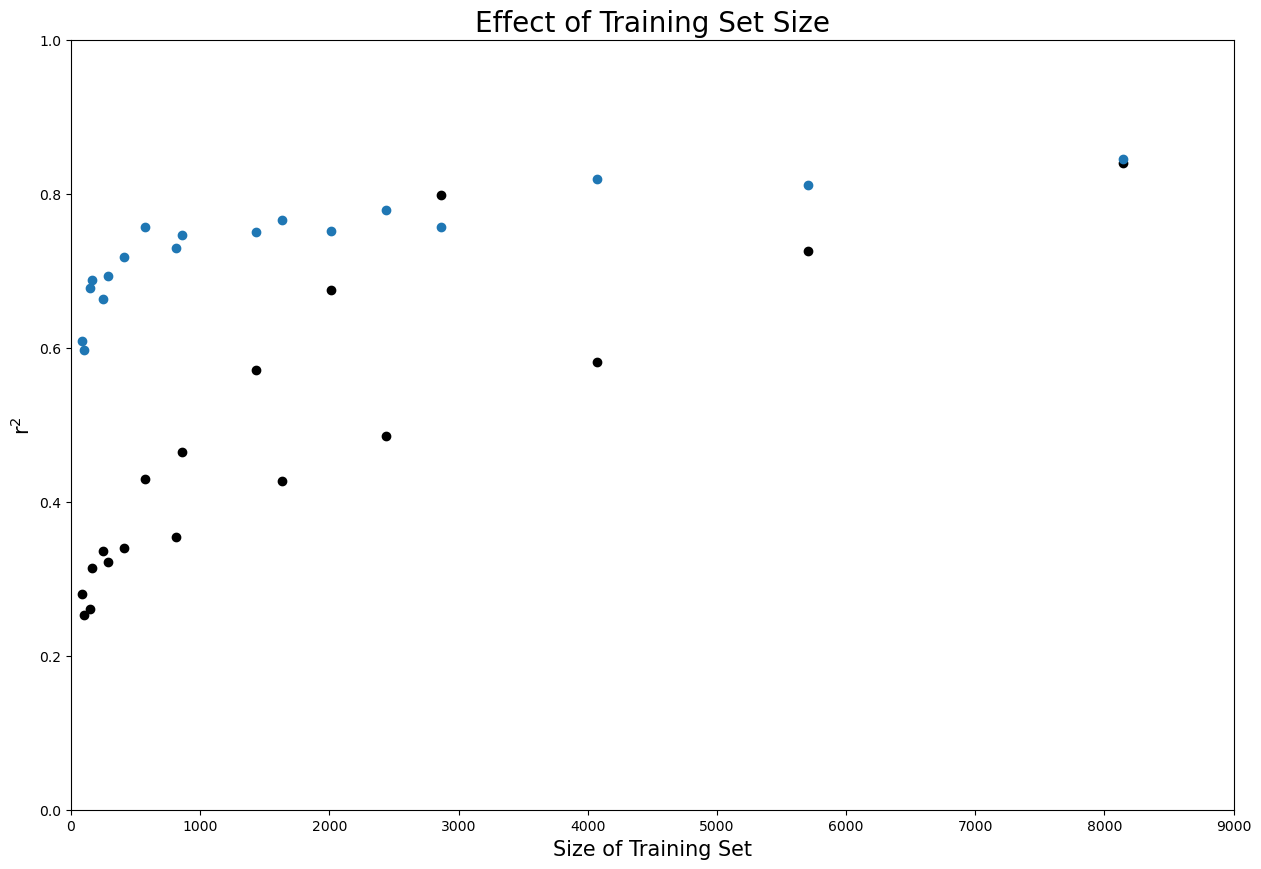

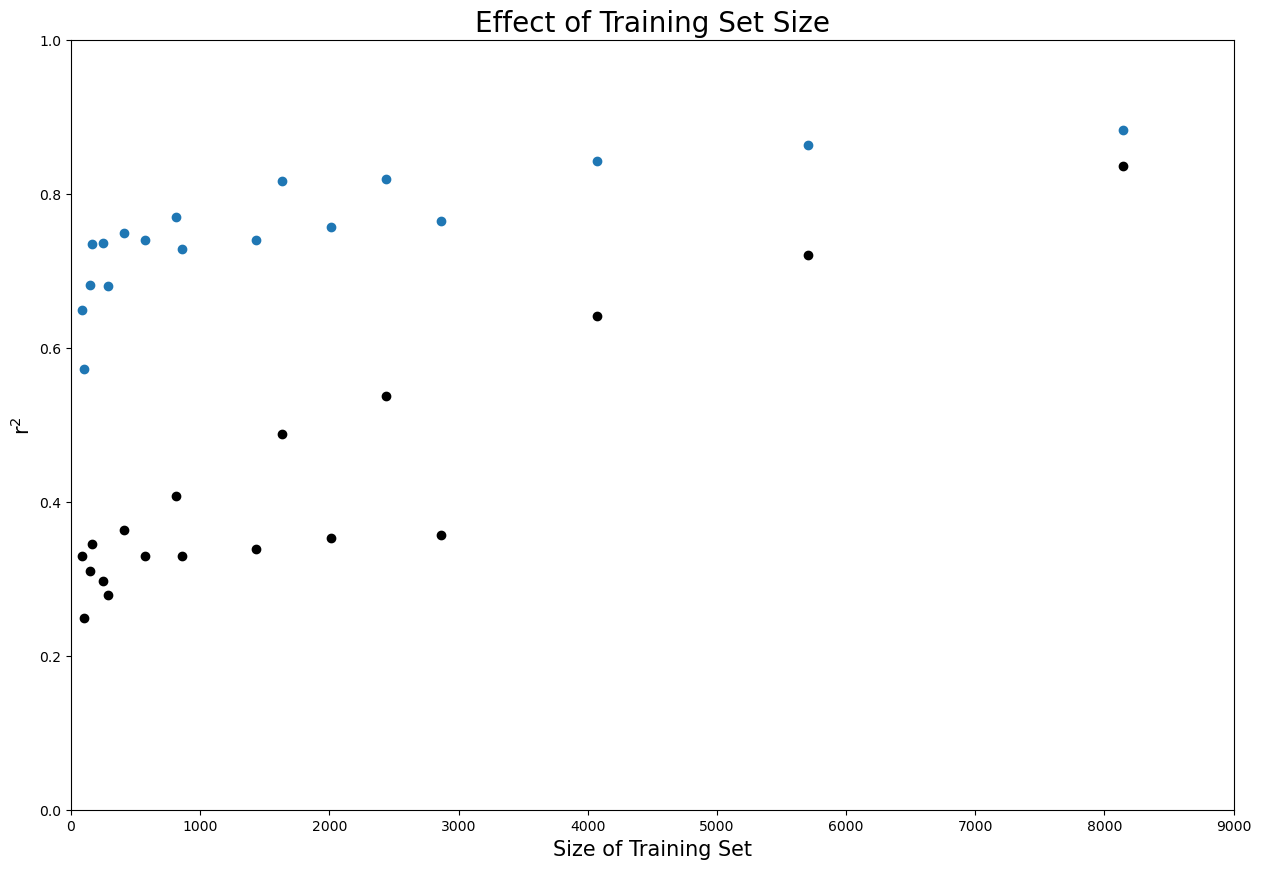

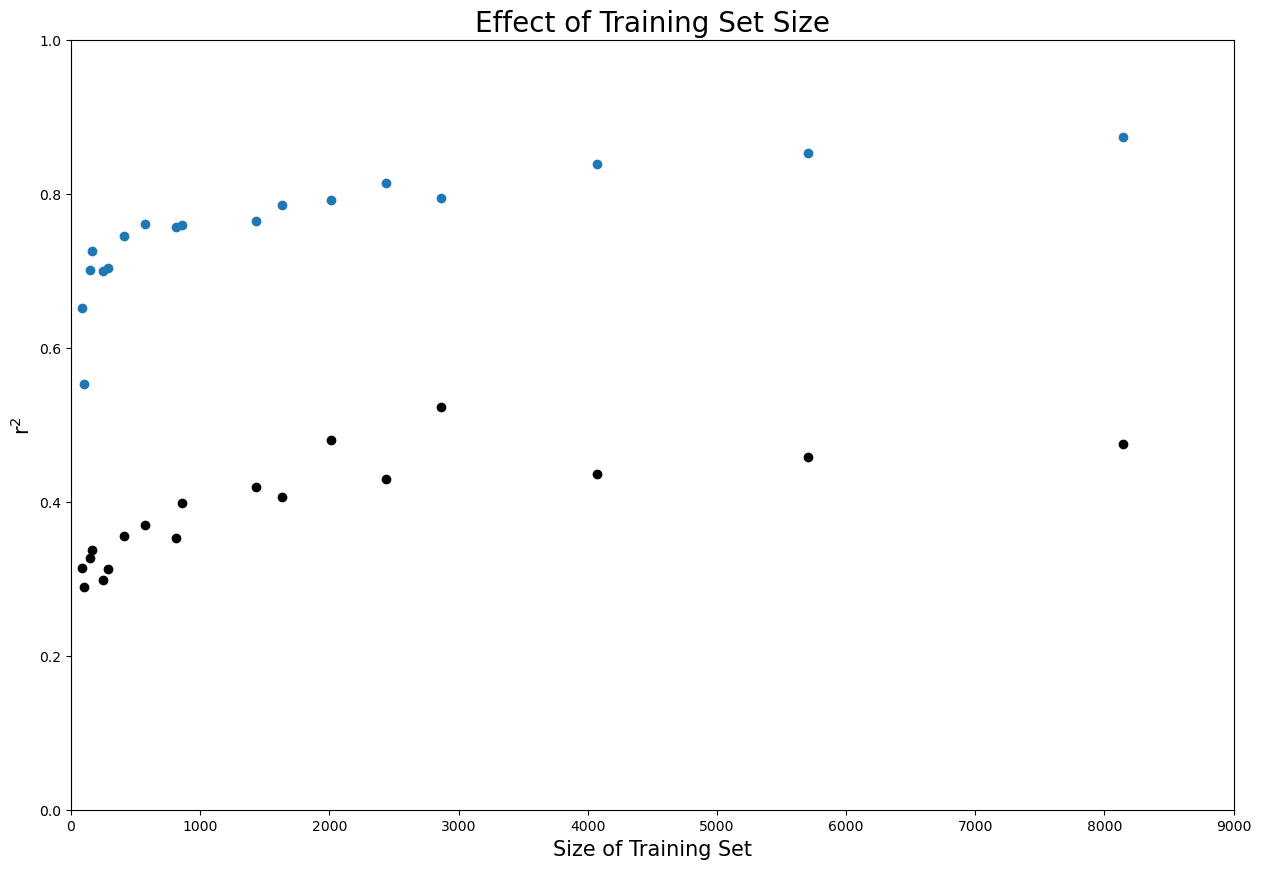

In [5]:
for tset in test_sets:
    to_plot = {'COF': {'n_train': list(),
                       'r_square': list()},
               'intercept': {'n_train': list(),
                             'r_square': list()}}
    for target in ['COF', 'intercept']:
        for model, data in results[tset][target].items():
            to_plot[target]['n_train'].append(data['n_train'])
            to_plot[target]['r_square'].append(data['r_square'])

    plt.style.use('default')
    plt.figure(figsize=(15, 10))

    plt.title('Effect of Training Set Size', fontsize=20)
    plt.xlabel('Size of Training Set', fontsize=15)
    plt.ylabel('r$^2$', fontsize=15)
    plt.xlim(0, 9000)
    plt.ylim(0, 1)
    plt.scatter(x=to_plot['COF']['n_train'],
                y=to_plot['COF']['r_square'],
                color='black')
    plt.scatter(x=to_plot['intercept']['n_train'],
                y=to_plot['intercept']['r_square'])

## Refined R<sup>2</sup> plot 
Original and 5050 model with 5050 test set

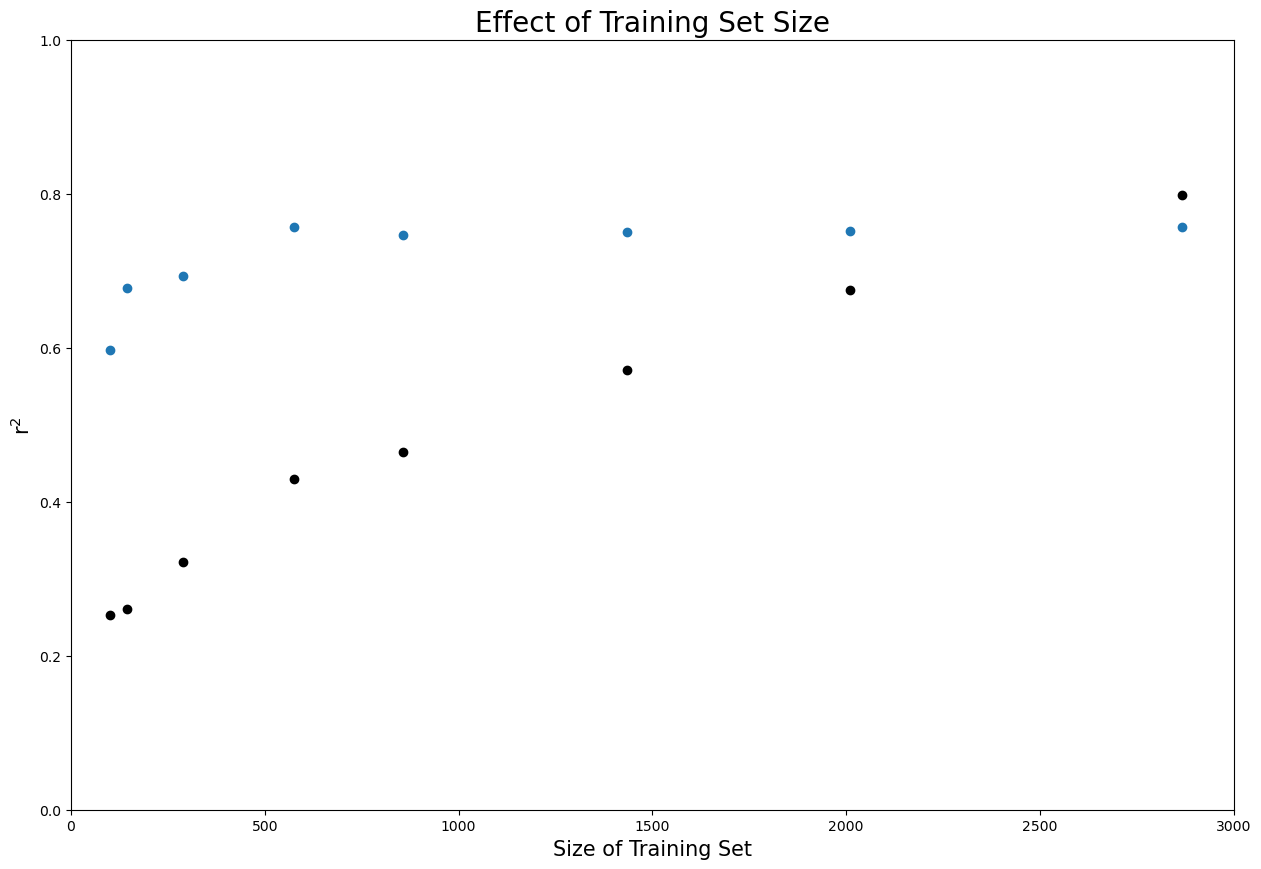

In [6]:
to_plot_on_5050 = {'COF': {'n_train': list(),
                           'r_square': list()},
                   'intercept': {'n_train': list(),
                                 'r_square': list()}}
for target in ['COF', 'intercept']:
    for model, data in results['5050'][target].items():
        if ('original' in model) or ('5050' in model):
            to_plot_on_5050[target]['n_train'].append(data['n_train'])
            to_plot_on_5050[target]['r_square'].append(data['r_square'])
            
plt.style.use('default')
plt.figure(figsize=(15, 10))

plt.title('Effect of Training Set Size', fontsize=20)
plt.xlabel('Size of Training Set', fontsize=15)
plt.ylabel('r$^2$', fontsize=15)
plt.xlim(0, 3000)
plt.ylim(0, 1)
plt.scatter(x=to_plot_on_5050['COF']['n_train'],
            y=to_plot_on_5050['COF']['r_square'],
            color='black')
plt.scatter(x=to_plot_on_5050['intercept']['n_train'],
            y=to_plot_on_5050['intercept']['r_square'])

In [9]:
pprint(to_plot_on_5050)

{'COF': {'n_train': [100, 144, 288, 576, 858, 1434, 2010, 2868],
         'r_square': [0.25284330595469917,
                      0.26072692156055255,
                      0.3220336059545279,
                      0.42934987462720997,
                      0.4647784045207607,
                      0.5704900845576912,
                      0.6743147640307192,
                      0.7989064504398073]},
 'intercept': {'n_train': [100, 144, 288, 576, 858, 1434, 2010, 2868],
               'r_square': [0.5966688607874848,
                            0.6777691024338023,
                            0.6933977125391252,
                            0.7569577574617408,
                            0.7470174715848097,
                            0.7503569949892781,
                            0.7519161162965309,
                            0.7573043505121597]}}


## Refined R<sup>2</sup> plot 
Original and 5050 model with 2575

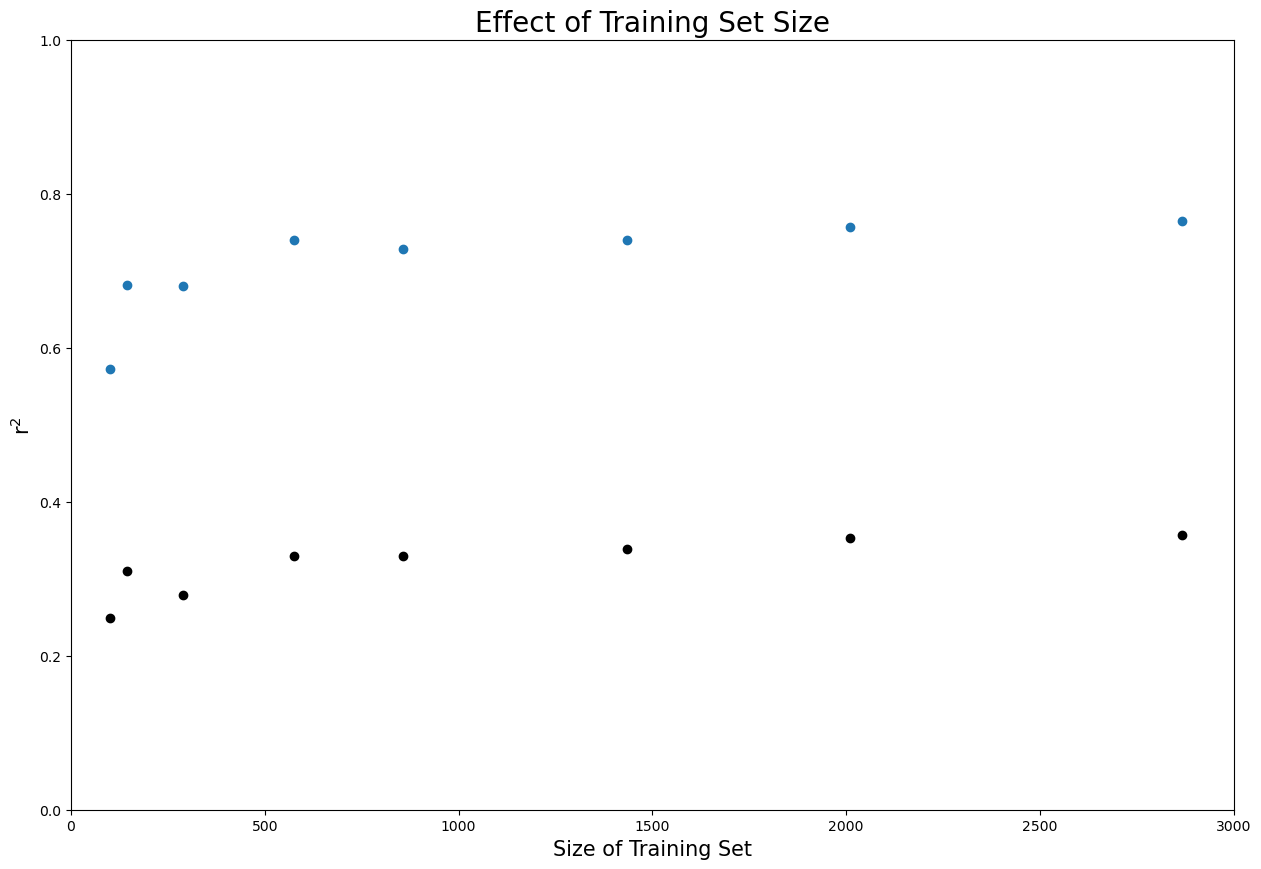

In [7]:
to_plot_on_2575 = {'COF': {'n_train': list(),
                           'r_square': list()},
                   'intercept': {'n_train': list(),
                                 'r_square': list()}}
for target in ['COF', 'intercept']:
    for model, data in results['2575'][target].items():
        if ('original' in model) or ('5050' in model):
            to_plot_on_2575[target]['n_train'].append(data['n_train'])
            to_plot_on_2575[target]['r_square'].append(data['r_square'])
            
plt.style.use('default')
plt.figure(figsize=(15, 10))

plt.title('Effect of Training Set Size', fontsize=20)
plt.xlabel('Size of Training Set', fontsize=15)
plt.ylabel('r$^2$', fontsize=15)
plt.xlim(0, 3000)
plt.ylim(0, 1)
plt.scatter(x=to_plot_on_2575['COF']['n_train'],
            y=to_plot_on_2575['COF']['r_square'],
            color='black')
plt.scatter(x=to_plot_on_2575['intercept']['n_train'],
            y=to_plot_on_2575['intercept']['r_square'])

In [10]:
pprint(to_plot_on_2575)

{'COF': {'n_train': [100, 144, 288, 576, 858, 1434, 2010, 2868],
         'r_square': [0.24866463126042182,
                      0.3102580518604061,
                      0.2786276945985515,
                      0.32891371604385433,
                      0.32982536056743583,
                      0.3379717420629571,
                      0.352580418788052,
                      0.3567391685871839]},
 'intercept': {'n_train': [100, 144, 288, 576, 858, 1434, 2010, 2868],
               'r_square': [0.5729291442807833,
                            0.6813017400360657,
                            0.68002397429062,
                            0.7405463038725892,
                            0.7283679637859788,
                            0.7400300361889307,
                            0.7574138908549373,
                            0.7645828670078251]}}


## Refined R<sup>2</sup> plot 
Everything model on everything test set

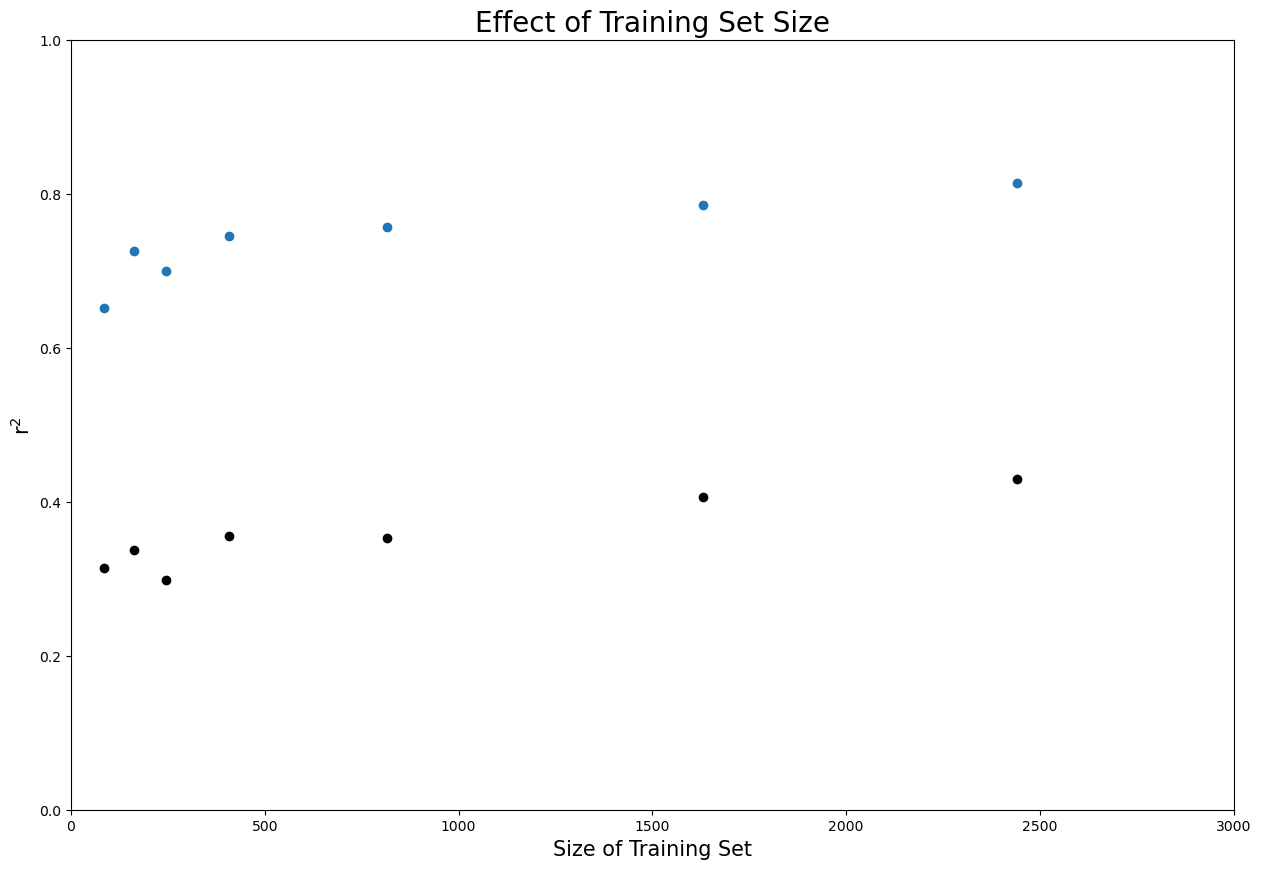

In [8]:
to_plot_on_everything = {'COF': {'n_train': list(),
                           'r_square': list()},
                   'intercept': {'n_train': list(),
                                 'r_square': list()}}
for target in ['COF', 'intercept']:
    for model, data in results['everything'][target].items():
        if ('everything' in model):
            to_plot_on_everything[target]['n_train'].append(data['n_train'])
            to_plot_on_everything[target]['r_square'].append(data['r_square'])
            
plt.style.use('default')
plt.figure(figsize=(15, 10))

plt.title('Effect of Training Set Size', fontsize=20)
plt.xlabel('Size of Training Set', fontsize=15)
plt.ylabel('r$^2$', fontsize=15)
plt.xlim(0, 3000)
plt.ylim(0, 1)
plt.scatter(x=to_plot_on_everything['COF']['n_train'],
            y=to_plot_on_everything['COF']['r_square'],
            color='black')
plt.scatter(x=to_plot_on_everything['intercept']['n_train'],
            y=to_plot_on_everything['intercept']['r_square'])

In [11]:
pprint(to_plot_on_everything)

{'COF': {'n_train': [84, 162, 246, 408, 816, 1632, 2442, 4074, 5706, 8148],
         'r_square': [0.31348063825497086,
                      0.3377048568242583,
                      0.29806102166254567,
                      0.35582014000756623,
                      0.3526848717823037,
                      0.4060004630871519,
                      0.4290336524533923,
                      0.43563409259121866,
                      0.4580699046084482,
                      0.47452436327202174]},
 'intercept': {'n_train': [84,
                           162,
                           246,
                           408,
                           816,
                           1632,
                           2442,
                           4074,
                           5706,
                           8148],
               'r_square': [0.6518100787524772,
                            0.7254106873695743,
                            0.7002393329777004,
                            